In [1]:
import sys
sys.path.insert(0, '../src')

from environment import Environment
from integersolution import integer_solution
from utils import *

import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# to save variables on file along to way
# (Notice: the calculations are sometimes very long. We should minimize the risk of losing information)
SAVE_FOLDER = "./saved_results/hotel_example/"
import os
os.makedirs(SAVE_FOLDER, exist_ok=True)

# the base modules
module = "battle_creekhs_1"

matrices = [get_building_matrix(module)]

# Varying number of modules
Fixed connection distance at = 20  
Fixed number of robots at 10

In [4]:
CONNECTION_DISTANCE = 20
m = 10

In [5]:
mod_tours = []
mod_max_len = []
mod_time = []
mod_avg_len = []
mod_std_len = []

mod_R=list(range(10,101,2))

for number_of_modules in mod_R:
    modules_sequence = [0]*number_of_modules
    distances = [CONNECTION_DISTANCE]*(number_of_modules-1)
    env = Environment(matrices, modules_sequence, distances)
    
    mod_start_time = time.time()
    mod_tours = integer_solution(env, m)
    
    mod_end_time = time.time()
    
    mod_avg_len.append( avg_length(mod_tours, env) )
    mod_max_len.append( max_length(mod_tours, env)[0] )
    mod_std_len.append( std_length(mod_tours, env) )
    
    mod_time.append(mod_end_time - mod_start_time)

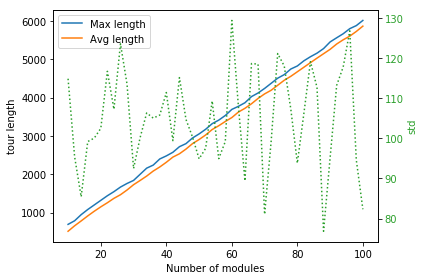

In [29]:
fig, ax1 = plt.subplots()

ax1.set_ylabel('tour length')
ax1.set_xlabel('Number of modules')
max_plot, = ax1.plot(mod_R, mod_max_len)
avg_plot, = ax1.plot(mod_R, mod_avg_len)

ax1.legend((max_plot, avg_plot), ("Max length", "Avg length"))

ax2 = ax1.twinx() 

color = 'tab:green'
ax2.set_ylabel('std', color=color)
ax2.plot(mod_R, mod_std_len, ':', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

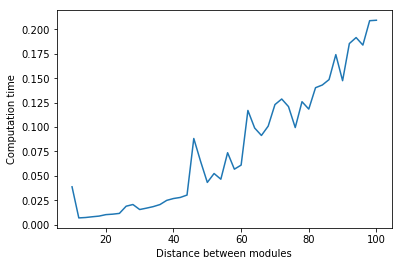

In [21]:
fig, ax1 = plt.subplots()

ax1.set_ylabel('Computation time')
ax1.set_xlabel('Distance between modules')
ax1.plot(mod_R, mod_time)

# Varying number of robots
Fixed connection distance  
Fixed number of modules

In [34]:
CONNECTION_DISTANCE = 20
number_of_modules = 30

In [35]:
rob_tours = []
rob_max_len = []
rob_time = []
rob_avg_len = []
rob_std_len = []

rob_R=list(range(1,number_of_modules+1))

for m in rob_R:
    modules_sequence = [0]*number_of_modules
    distances = [CONNECTION_DISTANCE]*(number_of_modules-1)
    env = Environment(matrices, modules_sequence, distances)
    
    rob_start_time = time.time()
    rob_tours = integer_solution(env, m)
    
    rob_end_time = time.time()
    
    rob_avg_len.append( avg_length(rob_tours, env) )
    rob_max_len.append( max_length(rob_tours, env)[0] )
    rob_std_len.append( std_length(rob_tours, env) )
    
    rob_time.append(rob_end_time - rob_start_time)

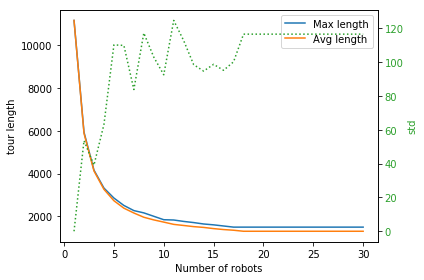

In [36]:
fig, ax1 = plt.subplots()

ax1.set_ylabel('tour length')
ax1.set_xlabel('Number of robots')
max_plot, = ax1.plot(rob_R, rob_max_len)
avg_plot, = ax1.plot(rob_R, rob_avg_len)

ax1.legend((max_plot, avg_plot), ("Max length", "Avg length"))

ax2 = ax1.twinx() 

color = 'tab:green'
ax2.set_ylabel('std', color=color)
ax2.plot(rob_R, rob_std_len, ':', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

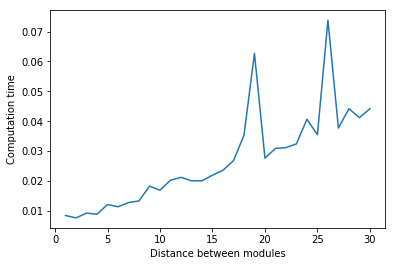

In [37]:
fig, ax1 = plt.subplots()

ax1.set_ylabel('Computation time')
ax1.set_xlabel('Distance between modules')
ax1.plot(rob_R, rob_time)

# Varying connection distance
Fixed number of robots = 10  
Fixed number of modules at 40

In [12]:
m = 10
number_of_modules = 40

In [13]:
dist_tours = []
dist_max_len = []
dist_time = []
dist_avg_len = []
dist_std_len = []

dist_R=list(range(0,100,5))

for connection_distance in dist_R:
    modules_sequence = [0]*number_of_modules
    distances = [connection_distance]*(number_of_modules-1)
    env = Environment(matrices, modules_sequence, distances)
    
    dist_start_time = time.time()
    dist_tours = integer_solution(env, m)
    
    dist_end_time = time.time()
    
    dist_avg_len.append( avg_length(dist_tours, env) )
    dist_max_len.append( max_length(dist_tours, env)[0] )
    dist_std_len.append( std_length(dist_tours, env) )
    
    dist_time.append(dist_end_time - dist_start_time)

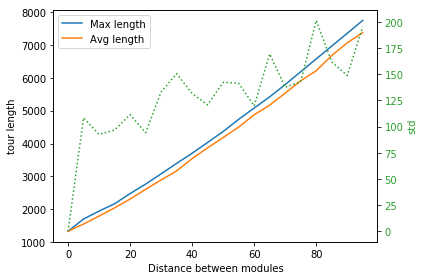

In [30]:
fig, ax1 = plt.subplots()

ax1.set_ylabel('tour length')
ax1.set_xlabel('Distance between modules')
max_plot, = ax1.plot(dist_R, dist_max_len)
avg_plot, = ax1.plot(dist_R, dist_avg_len)

ax1.legend((max_plot, avg_plot), ("Max length", "Avg length"))

ax2 = ax1.twinx() 

color = 'tab:green'
ax2.set_ylabel('std', color=color)
ax2.plot(dist_R, dist_std_len, ':', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

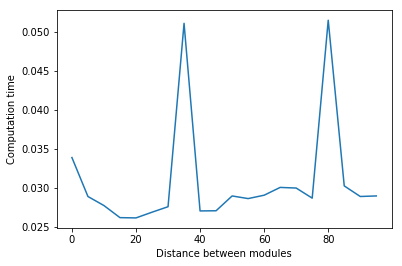

In [18]:
fig, ax1 = plt.subplots()

ax1.set_ylabel('Computation time')
ax1.set_xlabel('Distance between modules')
ax1.plot(dist_R, dist_time)